### 앙상블(Ensemble)은 결정 트리(Decision Tree)를 기반으로 쓴다. 이번 강에서는 앙상블을 중점적으로 살펴볼 예정　　
![분류 알고리즘](img/classify.png)

결정트리와 앙상블
![결정트리와 앙상블](img/decisionTree.png)

### 결정 트리는 스무고개 생각하면 됨

![결정 트리](img/decisionTree1.png)

트리 분할을 위한 데이터 균일도
![트리 분할을 위한 데이터 균일도](img/dataset.png)

균일도 기반 규칙 조건
![균일도 기반 규칙 조건](img/ifelse.png)

### 정보 균일도 측정 방법(정보이득, 지니 계수)

결정 트리에서 정보 균일도를 측정 하는 방법의 두가지이다.

**엔트로피**: 클라우드 쉐넌 박사가 주창함.기대값에서보면 어떤 정보가 계속적으로 많이 있으면 그 정보가 가지고 있는 기대값은 상대적으로 낮다.  
그렇지 않고 어떤 데이터셋에 그 정보가 자주 나타나지 않고 빈번하지 않은 정보는 정보의 효용성이 높라는 것.


**지니 계수**:로렌츠 곡선에 기반해서 만든 것. 1로 갈수록 불평등하다는 것은 예를 들면 상위 1%가 전체소득의 99%를 다 번다거나.
![정보 이득 지니계수](img/infogain.png)

### 결정 트리의 규칙 노드 생성 프로세스


![규칙노드](img/ifelse1.png)


<center>
    <h2> 결정 트리의 특징</h2>
</center>

|결정 트리 장점|결정 트리 단점|
|:----:|:---:|
|* 쉽다. 직관적이다|* 과적합으로 알고리즘 성능이 떨어진다. 이를 극복하기 위해 트리의 크기를 사전에 자한하는 튜닝 필요.|
|* 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음.||

결정트리의 문제는 모두를 단일 문제 값으로 만들기 위해 규칙이 계속 밑으로 내려감. 루프를 계속 돌면서 찾으려고 하다보니 규칙이 너무 많아짐. 즉 너무 복잡해짐. 이렇게 복잡하고 비대한 결정 트리가 생기면, 학습 데이터일 땐 좋은데 예측 데이터일 땐 오버피팅의 문제가 생길 수 있다. 오히려 하이퍼파라미터를 튜닝할때 결정트리를 잘라버리거나 줄여버리는게 더 좋을 때가 많다.

### 결정 트리 주요 하이퍼 파라미터

이번에 주요 파라미터 공부 후에 결정트리 시각화까지 해볼 것임.

결정 트리의 가장 큰 문제는 트리가 계속 커진 다는 것. 학습데이터에는 맞지만 테스트 데이터에서는 오버피팅의 문제가 생김.  
그러므로 결정 트리에서 트리의 크기를 제한하는 것에 대해 알아 볼 것임.


![결정트리 주요 하이퍼 파라미터](img/decisionTreeparam.png)

* Graphviz를 이용. 실행 파일(os에 깔리는 실행 파일.)
* 파이썬에 구성되어 있지 않기 때문에 파이썬 래퍼 모듈을 설치.
* OS 환경변수 구성(이게 좀 귀찮다)

### 결정 트리 모델의 시각화(Decision Tree Visualization)

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

In [7]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ModuleNotFoundError: No module named 'graphviz'

## 윗 셀 import graphviz isssue
ModuleNotFoundError: No module named 'graphviz'

문제 때문에 graphviz 불가. 이유를 알 수 가 없고 해결 할 수 가 없다..

<h1>Graphviz를 이용한 결정 트리 모델의 시각화</h1>


![결정트리](img/decisiongraph.png)

* **설명**

색이 연하면 분류가 불확실한 것. 진할 수록 분류가 확실한 것.

맨 위의 규칙을 통해서 분류하여 결정되면 조건이 필요 없는 리프 노드가 됨.

decision tree의 원래 룰은 지니계수가 커지는 방향으로 분할을 하는게 맞다.


<h1>Graphviz의 시각화 노드</h1>


![시각화노드](img/decisiongraph1.png)

<h1>max_depth에 따른 결정 트리 구조</h1>


더 간단해보이지만 더 강력할 수 있다.


![maxdepth](img/maxdepth.png)


<h1>min_samples_split에 따른 결정 트리 구조</h1>


min_samples_split이란 분할 할 수 있는 최소 데이터 값. 


![minsplit](img/minsplit.png)

<h1>min_samples_leaf에 따른 결정 트리 구조</h1>

![minleaf](img/minleaf.png)

<h1> 결정 트리의 Feature 선택 중요도 </h1>

무슨 말이냐면 피쳐들이 수백개 있으면 그 피쳐들이 다 학습하는 것보다 우등박, 즉 뛰어난 피쳐들만 학습하고 거기에 기반하여 패턴인식을 예측하는게

오히려 성능이 괜찮을 때가 있다(다 괜찮다는건 아님). 트리 모델은 이렇게 피쳐의 중요성을 쉽게 다 찾아줌.

![TreeFeature](img/TreeFeature.png)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


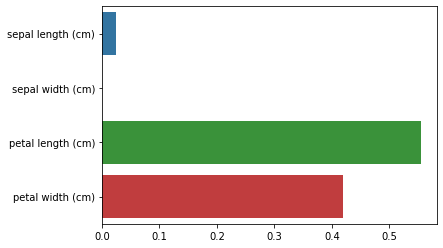

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

### 결정 트리(Decision TREE) 과적합(Overfitting)

설명: 트리 생성 제약없이 하다보면 outlier들을 위해 여러가지 규칙들이 더 생기게 되어버린다. 이러면 너무 복잡한 규칙들이 생겨나며 과적합 될 수 있다.
그러므로 오른쪽과 같이 짜는게 더 강건한 모델이 될 수 있다.
![TreeOverfittin](img/TreeOver.png)

## 결정 트리 실습- 사용자 행동 인식 데이터 세트
![행동인식](img/action.png)

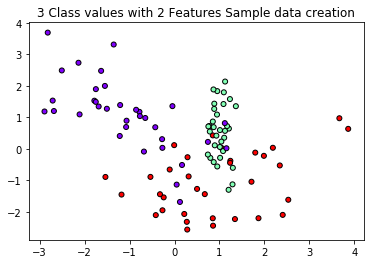

In [9]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [10]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

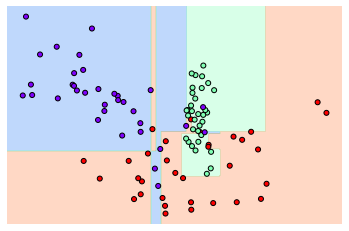

In [11]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

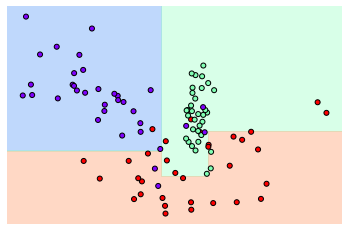

In [12]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### 결정 트리 실습 - Human Activity Recognition

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])#sep seperate는 공백으로 하겠다는 뜻

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()#피처네임은 리스트형태로 일단 만들어놨다.
print('전체 피처명에서 10개만 추출:', feature_name[:10])
feature_name_df.head(20)


전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
5,6,tBodyAcc-std()-Z
6,7,tBodyAcc-mad()-X
7,8,tBodyAcc-mad()-Y
8,9,tBodyAcc-mad()-Z
9,10,tBodyAcc-max()-X


### 수정 버전 01: 날짜 2019.10.27일

**원본 데이터에 중복된 Feature 명으로 인하여 신규 버전의 Pandas에서 Duplicate name 에러를 발생.**  
**중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성**

In [14]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [15]:
pd.options.display.max_rows = 999
new_feature_name_df = get_new_feature_name_df(feature_name_df)
new_feature_name_df[new_feature_name_df['dup_cnt'] > 0]

,column_index,column_name,dup_cnt
316,317,"fBodyAcc-bandsEnergy()-1,8_1",1
317,318,"fBodyAcc-bandsEnergy()-9,16_1",1
318,319,"fBodyAcc-bandsEnergy()-17,24_1",1
319,320,"fBodyAcc-bandsEnergy()-25,32_1",1
320,321,"fBodyAcc-bandsEnergy()-33,40_1",1
321,322,"fBodyAcc-bandsEnergy()-41,48_1",1
322,323,"fBodyAcc-bandsEnergy()-49,56_1",1
323,324,"fBodyAcc-bandsEnergy()-57,64_1",1
324,325,"fBodyAcc-bandsEnergy()-1,16_1",1
325,326,"fBodyAcc-bandsEnergy()-17,32_1",1


**아래 get_human_dataset() 함수는 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df() 함수를 반영하여 수정**

In [16]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [17]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


value count를 해보니 비교적 고르게 분포되어 있다.

In [18]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


Null값이 있는지 확인해보자.

In [23]:
X_train.isna().sum

<bound method DataFrame.sum of       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0                 False              False              False   
1                 False              False              False   
2                 False              False              False   
3                 False              False              False   
4                 False              False              False   
...                 ...                ...                ...   
7347              False              False              False   
7348              False              False              False   
7349              False              False              False   
7350              False              False              False   
7351              False              False              False   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0                False             False             False             False   
1                False      

전체 피쳐들의 값이 나와서 너무 많으므로 이걸 다시 한번 sum을 한다. null 값은 0으로 없다.

In [19]:
X_train.isna().sum().sum()

0

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)#학습
pred = dt_clf.predict(X_test)#예측
accuracy = accuracy_score(y_test , pred)#정확도
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


GridSearchCV를 이용해서 좀더 하이퍼파라미터 튜닝을 해보자.

35회 돌아가게 된다. 

In [21]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.4min finished


GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


### 이번엔 GridSearchCV 교차검정을 했을때 학습데이터와 검증데이터셋에서 수치가 어떻게 나왔는지 확인해볼 것이다.

### 수정 버전 01: 날짜 2019.10.27일  

**사이킷런 버전이 업그레이드 되면서 아래의 GridSearchCV 객체의 cv_results_에서 mean_train_score는 더이상 제공되지 않습니다.**  
**기존 코드에서 오류가 발생하시면 아래와 같이 'mean_train_score'를 제거해 주십시요**


In [24]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
# 사이킷런 버전이 업그레이드 되면서 아래의 GridSearchCV 객체의 cv_results_에서 mean_train_score는 더이상 제공되지 않습니다
# cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]


,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


아래 돌려본 결과 max_depth 가 8일때 가장 성능이 좋다.

In [25]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


In [26]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.7min finished


GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


이렇게 만들어진 측정 데이터로 이제 테스트 데이터를 한번 수행해볼 것임.
best_estimator_로 최적의 하이퍼 파라미터로서 다시 테스트를 수행해 볼 것.

0.8717은 최초의 0.85보다 하이퍼파라미터 튜닝을 통해 증가했다.

In [27]:
best_df_clf = grid_cv.best_estimator_

pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


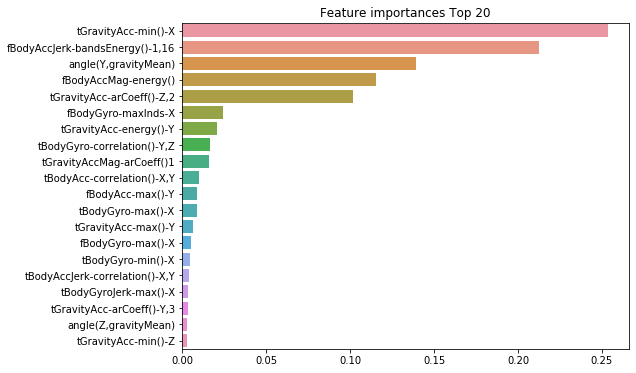

In [28]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()